In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(context="notebook", palette="Spectral", style = 'darkgrid' ,font_scale = 1.5, color_codes=True)

In [ ]:
dataset=pd.read_csv('/content/drive/MyDrive/Poster dataset.csv')

In [ ]:
X_scaled=dataset.iloc[:,[4,5]].values
labels_true=dataset.iloc[:,-1].values

In [ ]:
a=labels_true.shape

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler().fit(X)
X_scaled= scaler.transform(X)

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import davies_bouldin_score
from sklearn.metrics import calinski_harabasz_score
calinski_harabasz_avg = []
davies_bouldin_avg = []
silhouette_avg = []
labels_predicted=[]
for i in range(2, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 1)
    kmeans.fit(X_scaled)
    cluster_labels=kmeans.labels_
    labels_predicted.append([cluster_labels])
    # silhouette score
    silhouette_avg.append(silhouette_score(X_scaled, cluster_labels,metric='manhattan'))
    davies_bouldin_avg.append(davies_bouldin_score(X_scaled, cluster_labels))
    calinski_harabasz_avg.append(calinski_harabasz_score(X_scaled, cluster_labels))
print(calinski_harabasz_avg)
print(davies_bouldin_avg)
print(silhouette_avg)

[34433.50692371496, 40449.91739916497, 41691.99776603853, 40527.623245325085, 40867.856252202364, 39996.29627445557, 39989.7508616345, 40012.760752846945, 39797.41180023802]
[1.2164891295151266, 0.938095112837058, 0.9351740481248774, 0.9103401404784137, 0.8742611485744561, 0.8852253287783199, 0.8770509649914702, 0.8560940847520792, 0.8578201820301732]
[0.34254043765395165, 0.3348396807156145, 0.32414203640699707, 0.3174921716771049, 0.32388028003984004, 0.31607353432983276, 0.3210338162256816, 0.3155691521928914, 0.3152846113176245]


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


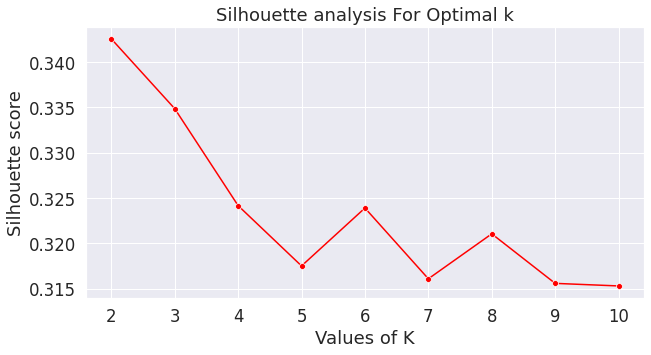

In [ ]:
plt.figure(figsize=(10,5))
sns.lineplot(range(2, 11), silhouette_avg,marker='o',color='red')
plt.xlabel('Values of K')
plt.ylabel('Silhouette score')
plt.title('Silhouette analysis For Optimal k')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


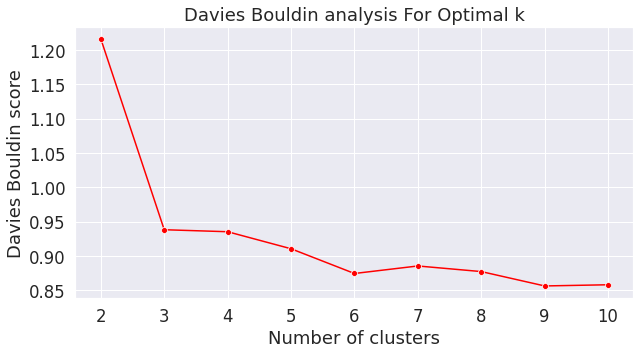

In [ ]:
plt.figure(figsize=(10,5))
sns.lineplot(range(2, 11), davies_bouldin_avg,marker='o',color='red')
plt.title('Davies Bouldin analysis For Optimal k')
plt.xlabel('Number of clusters')
plt.ylabel('Davies Bouldin score')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


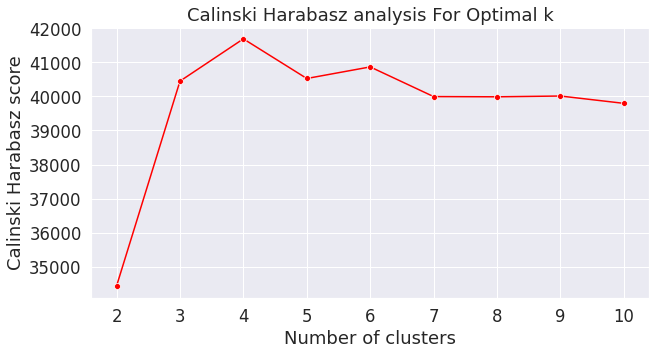

In [ ]:
plt.figure(figsize=(10,5))
sns.lineplot(range(2, 11), calinski_harabasz_avg,marker='o',color='red')
plt.title('Calinski Harabasz analysis For Optimal k')
plt.xlabel('Number of clusters')
plt.ylabel('Calinski Harabasz score')
plt.show()

In [ ]:
# for un adjusted rand index
import numpy as np
from sklearn.metrics import adjusted_rand_score
from sklearn.metrics import fowlkes_mallows_score
from sklearn.metrics import adjusted_mutual_info_score
from sklearn.metrics import homogeneity_score
from sklearn.metrics import completeness_score
from sklearn.metrics import v_measure_score
mutual_infoscore=[]
randscore=[]
fowlkes_score=[]
H_score=[]
C_score=[]
V_score=[]
for i in range(0,9):
    labels_p=(np.array(labels_predicted[i])).reshape(a)
    randscore.append(adjusted_rand_score(labels_true,labels_p))
    fowlkes_score.append(fowlkes_mallows_score(labels_true,labels_p))
    mutual_infoscore.append(adjusted_mutual_info_score(labels_true,labels_p))
    H_score.append(homogeneity_score(labels_true,labels_p))
    C_score.append(completeness_score(labels_true,labels_p))
    V_score.append(v_measure_score(labels_true,labels_p))
print(randscore)
print(fowlkes_score)
print( mutual_infoscore)
print(H_score)
print(C_score)
print(V_score)

# Perfect labeling is scored 1.0:


[0.013080749883609777, 0.0388211229229044, 0.03424294168346011, 0.03874150658004091, 0.03405488191809041, 0.035067568581484465, 0.032832639339093785, 0.03182331399533354, 0.028774974825303633]
[0.3269091381507721, 0.2886991892729951, 0.25130164985180403, 0.2336829230821958, 0.2153442121173144, 0.20514212316104158, 0.19405637074019938, 0.1852498297156369, 0.17502314651626638]
[0.015328557117503637, 0.04350028896848716, 0.03928234984198163, 0.04609057094611921, 0.05185046524482806, 0.052336251138303785, 0.05819757699835291, 0.06057221130921935, 0.05761355810220686]
[0.010985805608476477, 0.03663431881497707, 0.03658769819842629, 0.04599968388382173, 0.05450950349285218, 0.0573648823692804, 0.0659312985723486, 0.07073999284416045, 0.06923305635390346]
[0.0254906524751374, 0.053662529815612765, 0.04254084729617691, 0.04632590246881751, 0.049592682283993654, 0.04828285237448746, 0.05226274447403572, 0.05314477337631434, 0.049528230443535104]
[0.015354306181985801, 0.04354283135009402, 0.039

In [ ]:
df=pd.DataFrame({'silhoutte score':silhouette_avg,'Davies_Bouldin score':davies_bouldin_avg,
                 'Calinski_harabasz score':calinski_harabasz_avg,'Adjusted_rand_score':randscore,
                 'Fowlkes_mallows_score':fowlkes_score,'Adjusted_mutual_info_score':mutual_infoscore,
                 'Homogeneity_score':H_score,'Completeness_score':C_score,'v_measure_score':V_score})
df.to_csv('Poster_2 Clustering_Evaluation.csv',index=False)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


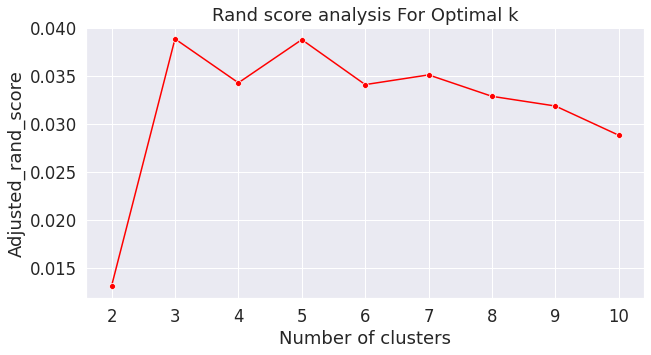

In [ ]:
plt.figure(figsize=(10,5))
sns.lineplot(range(2, 11), randscore,marker='o',color='red')
plt.title('Rand score analysis For Optimal k')
plt.xlabel('Number of clusters')
plt.ylabel('Adjusted_rand_score')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


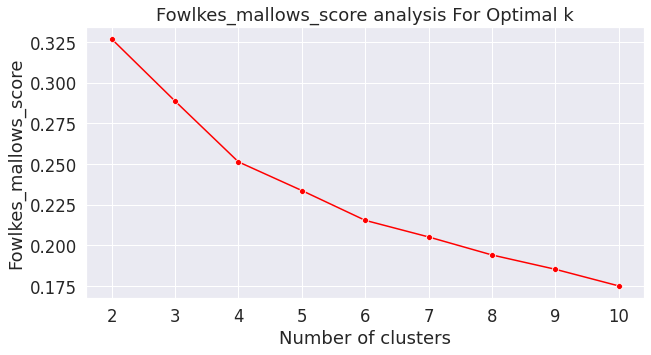

In [ ]:
plt.figure(figsize=(10,5))
sns.lineplot(range(2, 11), fowlkes_score,marker='o',color='red')
plt.title('Fowlkes_mallows_score analysis For Optimal k')
plt.xlabel('Number of clusters')
plt.ylabel('Fowlkes_mallows_score')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


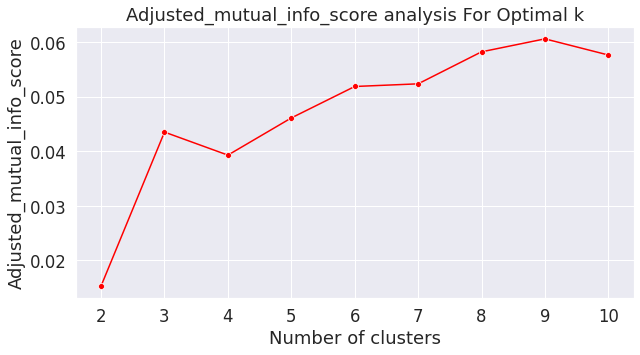

In [ ]:
plt.figure(figsize=(10,5))
sns.lineplot(range(2, 11), mutual_infoscore,marker='o',color='red')
plt.title('Adjusted_mutual_info_score analysis For Optimal k')
plt.xlabel('Number of clusters')
plt.ylabel('Adjusted_mutual_info_score')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


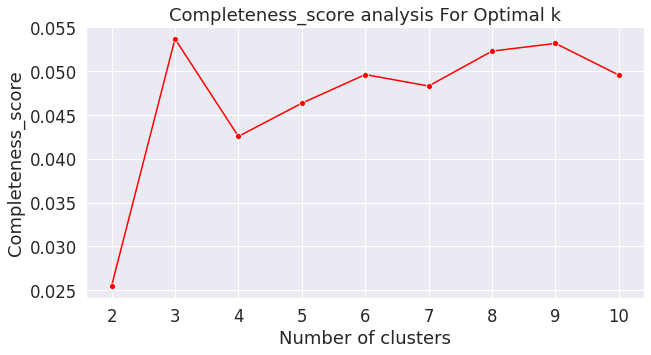

In [ ]:
plt.figure(figsize=(10,5))
sns.lineplot(range(2, 11), C_score,marker='o',color='red')
plt.title('Completeness_score analysis For Optimal k')
plt.xlabel('Number of clusters')
plt.ylabel('Completeness_score')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


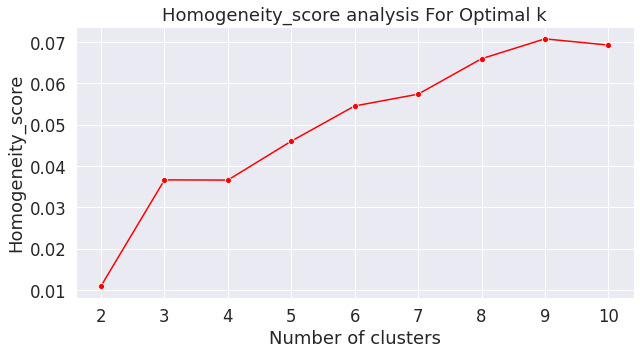

In [ ]:
plt.figure(figsize=(10,5))
sns.lineplot(range(2, 11), H_score,marker='o',color='red')
plt.title('Homogeneity_score analysis For Optimal k')
plt.xlabel('Number of clusters')
plt.ylabel('Homogeneity_score')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


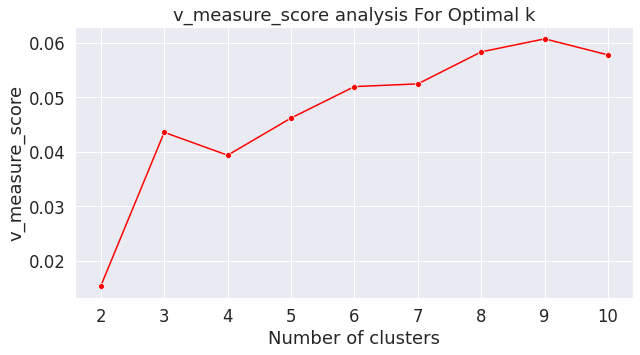

In [ ]:
plt.figure(figsize=(10,5))
sns.lineplot(range(2, 11), V_score,marker='o',color='red')
plt.title('v_measure_score analysis For Optimal k')
plt.xlabel('Number of clusters')
plt.ylabel('v_measure_score')
plt.show()

In [ ]:
pip install PyAudio

  ERROR: Failed building wheel for PyAudio
  Running setup.py clean for PyAudio
Failed to build PyAudio
    Running setup.py install for PyAudio ... error
ERROR: Command errored out with exit status 1: /usr/bin/python3 -u -c 'import io, os, sys, setuptools, tokenize; sys.argv[0] = '"'"'/tmp/pip-install-a9agy2rd/pyaudio_acaeec74a21c45fc8b5bfc7858ed4dea/setup.py'"'"'; __file__='"'"'/tmp/pip-install-a9agy2rd/pyaudio_acaeec74a21c45fc8b5bfc7858ed4dea/setup.py'"'"';f = getattr(tokenize, '"'"'open'"'"', open)(__file__) if os.path.exists(__file__) else io.StringIO('"'"'from setuptools import setup; setup()'"'"');code = f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' install --record /tmp/pip-record-1i4euh0f/install-record.txt --single-version-externally-managed --compile --install-headers /usr/local/include/python3.7/PyAudio Check the logs for full command output.


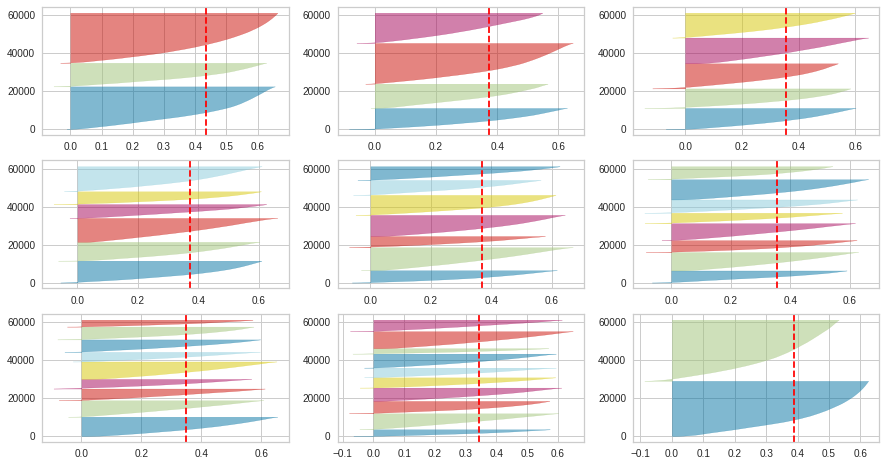

In [ ]:
from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.cluster import KMeans

fig, ax = plt.subplots(3, 3, figsize=(15,8))
for i in range(2,11):
    '''
    Create KMeans instance for different number of clusters
    '''
    km = KMeans(n_clusters=i, init='k-means++', n_init=10, random_state=42)
    q, mod = divmod(i, 3)
    '''
    Create SilhouetteVisualizer instance with KMeans instance
    Fit the visualizer
    '''
    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(X_scaled)

In [ ]:
X=dataset.drop(['Label'],axis=1)
labels_true=dataset.iloc[:,-1].values

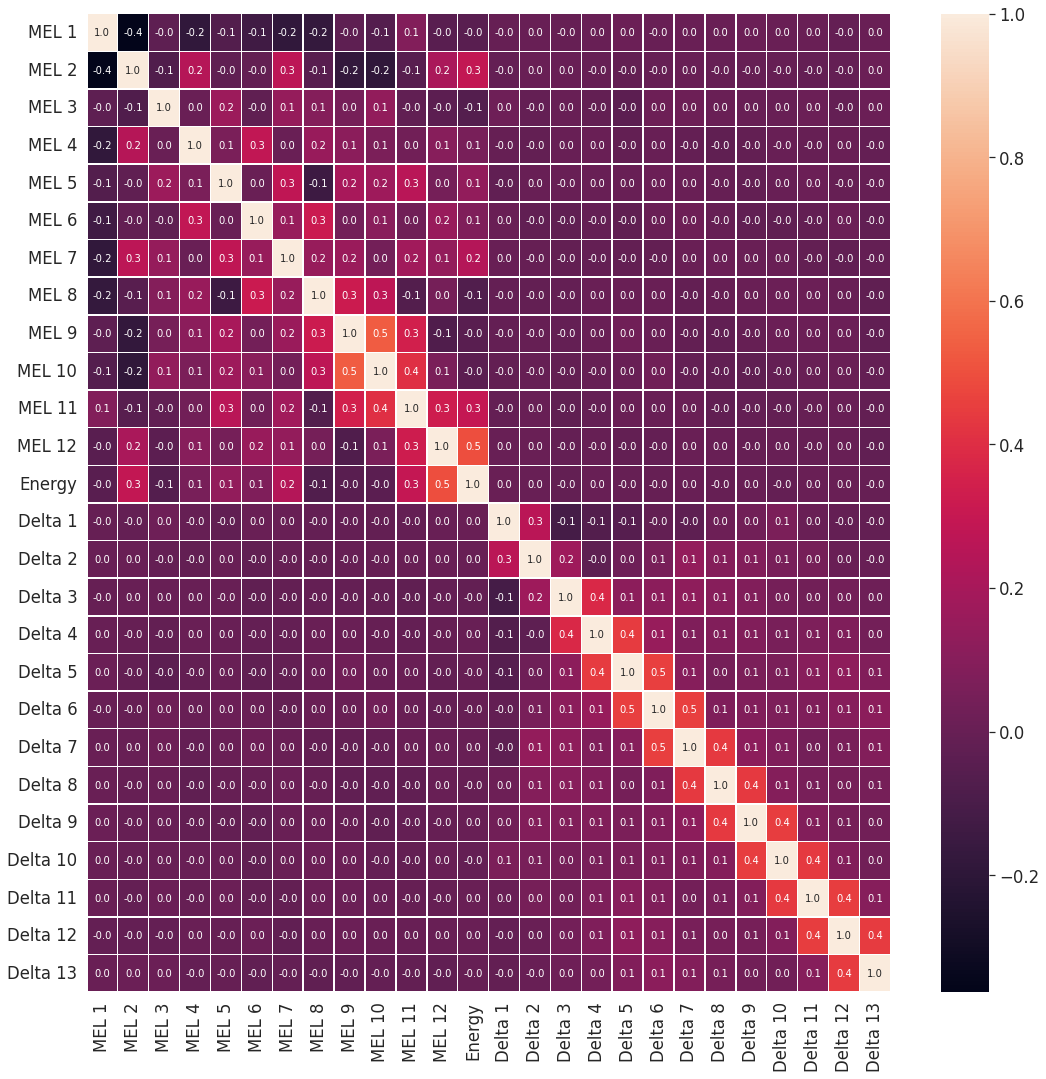

In [ ]:
#correlation map
f,ax = plt.subplots(figsize=(18, 18))
sns.heatmap(X.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax);

In [ ]:
dataset2=pd.read_csv('/content/drive/MyDrive/MFCC Poster Combine.csv')

In [ ]:
X2=dataset2.drop(['Label'],axis=1)
labels_true2=dataset2.iloc[:,-1].values

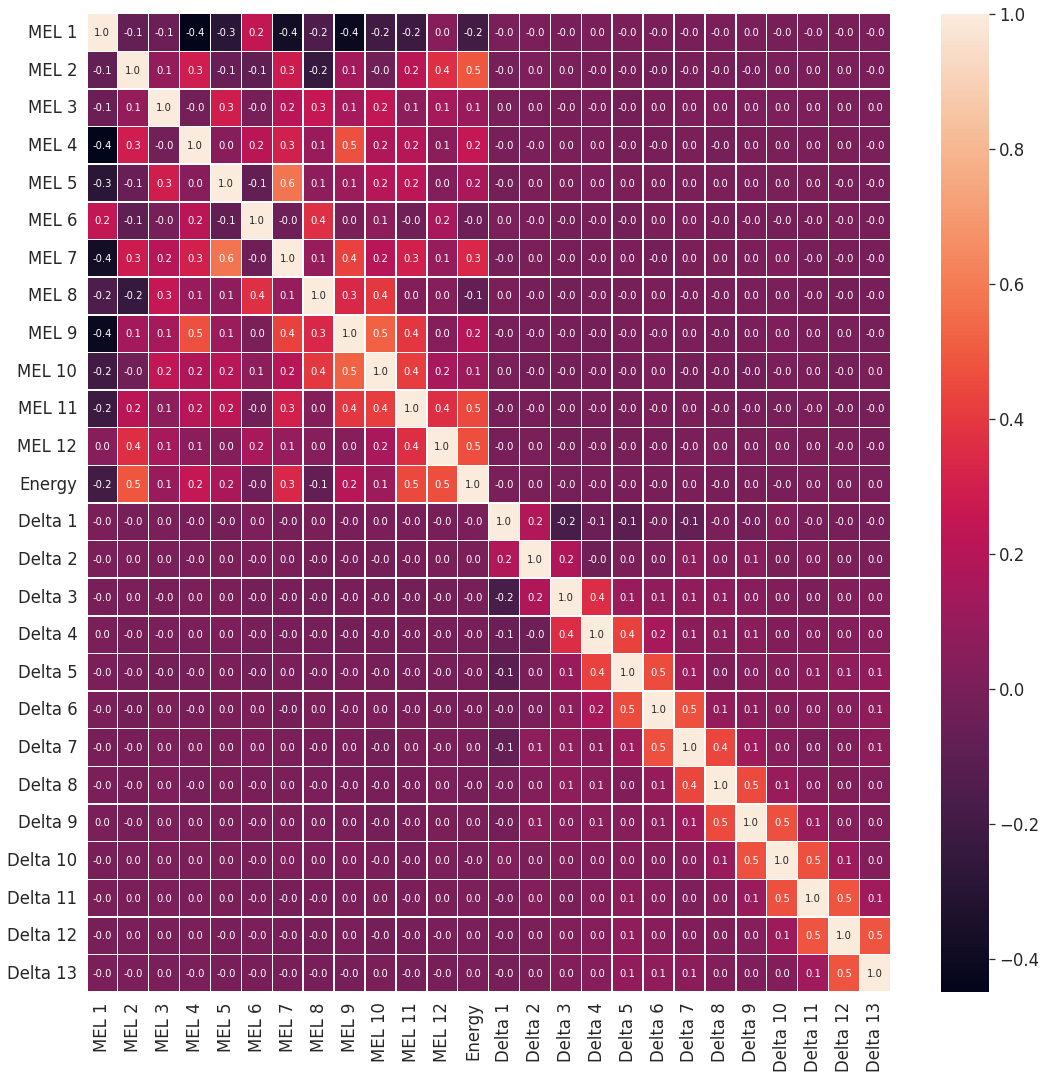

In [ ]:
#correlation map
f,ax = plt.subplots(figsize=(18, 18))
sns.heatmap(X2.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax);

In [ ]:
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
chi_square_value,p_value=calculate_bartlett_sphericity(X)
chi_square_value, p_value

(339204.13639092486, 0.0)

In [ ]:
pip install factor_analyzer

     |████████████████████████████████| 41 kB 400 kB/s 
  Created wheel for factor-analyzer: filename=factor_analyzer-0.4.0-py3-none-any.whl size=41455 sha256=7414c15250de1f4671ba64a8924ab3236c65ec7a95aa7e14f0f21b4dd7cb5cbe
  Stored in directory: /root/.cache/pip/wheels/ac/00/37/1f0e8a5039f9e9f207c4405bbce0796f07701eb377bfc6cc76
Successfully built factor-analyzer


In [ ]:
from factor_analyzer.factor_analyzer import calculate_kmo
kmo_all,kmo_model=calculate_kmo(X)

/usr/local/lib/python3.7/dist-packages/factor_analyzer/utils.py:249: UserWarning: The inverse of the variance-covariance matrix was calculated using the Moore-Penrose generalized matrix inversion, due to its determinant being at or very close to zero.
  warnings.warn('The inverse of the variance-covariance matrix '


In [ ]:
kmo_model

0.5295355056520884

In [ ]:
dataset3=pd.read_csv('/content/drive/MyDrive/paper_with_labels.csv')

In [ ]:
X3=dataset3.drop(['Label'],axis=1)
labels_true3=dataset3.iloc[:,-1].values

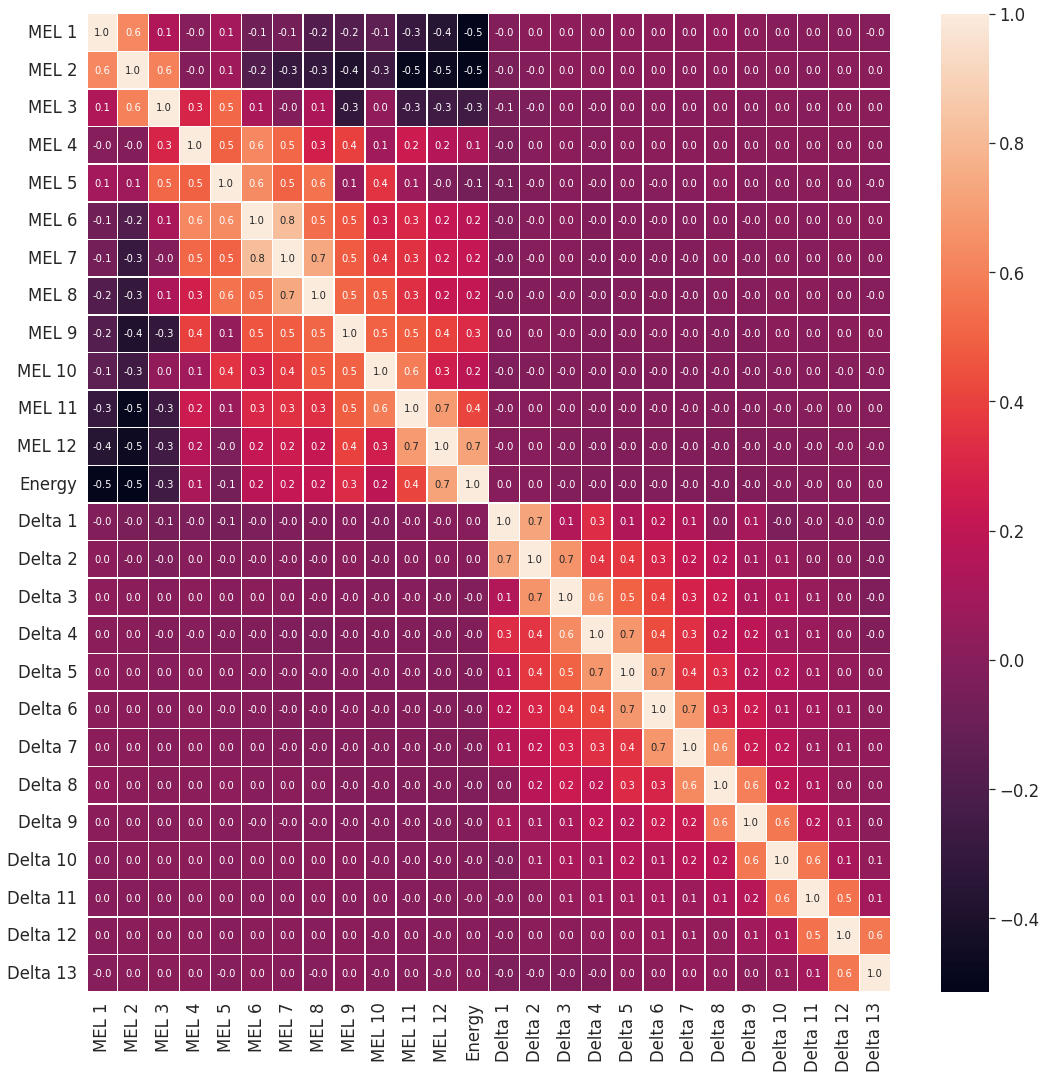

In [ ]:
#correlation map
f,ax = plt.subplots(figsize=(18, 18))
sns.heatmap(X3.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax);